In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from lmfit import Model
from sympy import symbols, solve
import openpyxl 
from sklearn.metrics import mean_absolute_error,mean_squared_error
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import optimize
import sympy as sp
import math as m
from matplotlib import pyplot as plt, patches

In [2]:
# simulation details
Z0 = (21.55/10) + 0.14  # height of the substrate
cell = [17.892,2.9514,20] # box size
# cell = [15.2096,3.6881,30] # box size
densmap = np.loadtxt("density.dat")
dimension = densmap.shape
shift = -cell[0]/2

In [3]:
# extracting Z and X axis

z = densmap[0,1:dimension[1]]
x = densmap[1:dimension[0],0] + shift

# extracting density 
to_kg_m3 = ((18.01528) * (10 ** -3)) / ((6.022 * 10 ** 23) * (10 ** -27))
# densmass = densmap * to_kg_m3
densmass = densmap * to_kg_m3
density = densmass[0:-1, 0:-1]
trans_dens = np.transpose(density)

### Determine the center point of droplet with densest mass density ####
maxdens_idx = np.argmax(trans_dens, axis=None) # returns the index of the maximum value in the array
maxdens_idx = np.unravel_index(maxdens_idx, trans_dens.shape)
print(maxdens_idx)
center_line = trans_dens[:, maxdens_idx[1]] # center line on the density


(116, 552)


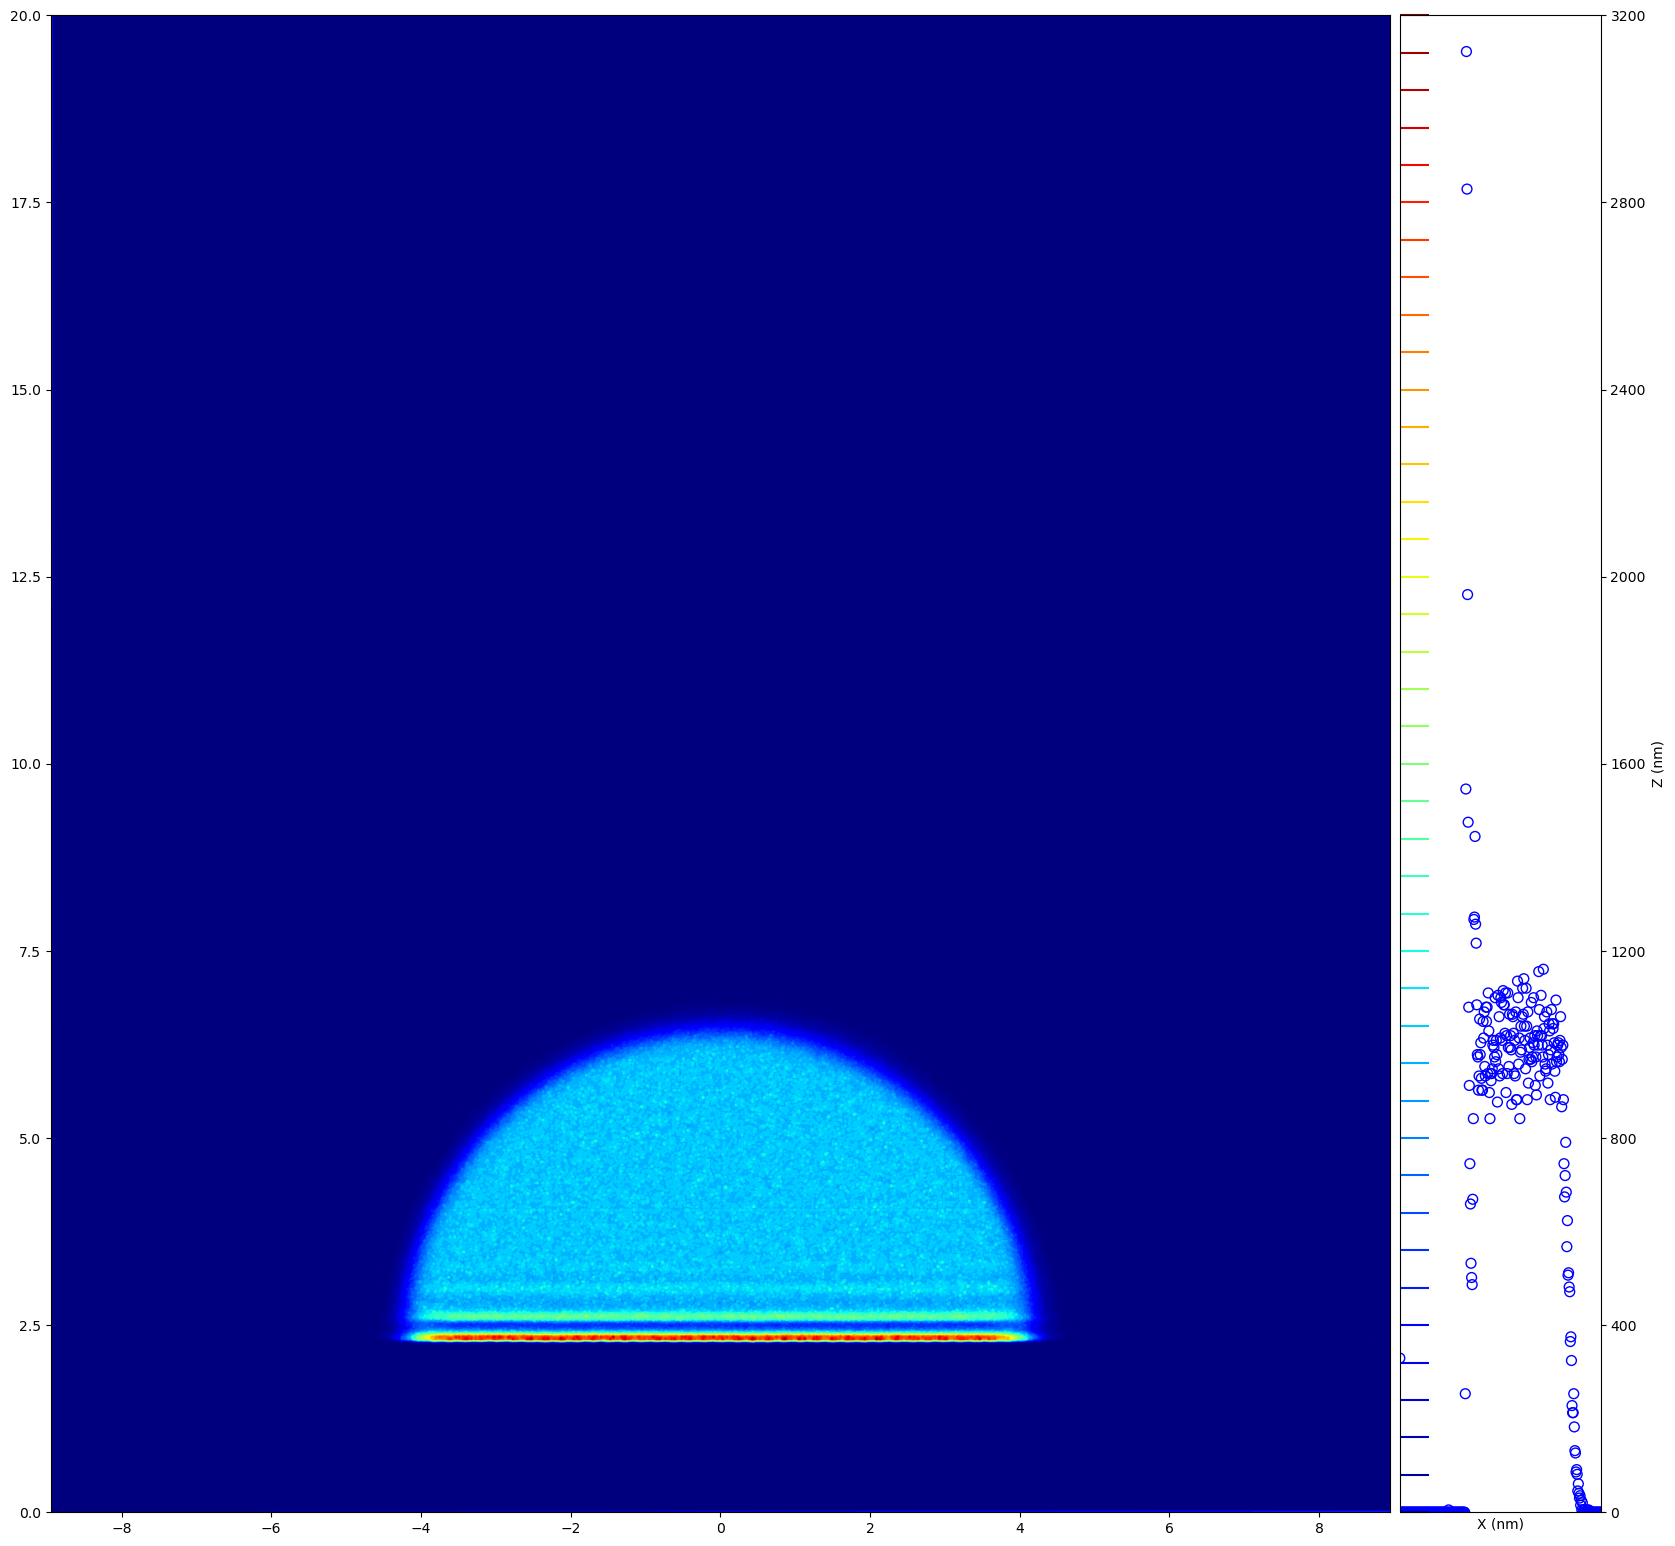

In [4]:
figuresize = [20, 20]
x_minmax = [-cell[0]/2, cell[0]/2]
y_minmax = [0, 20.0]


def plot_droplet():
    plt.figure(1, figsize=(figuresize[0], figuresize[1]))
    axes = plt.gca()
    axes.set_xlim([x_minmax[0], x_minmax[1]])
    axes.set_ylim([y_minmax[0], y_minmax[1]])
    axes.set_aspect(1)
    masscontour = plt.contour(x, z, trans_dens, 50, cmap="jet", origin="lower")
    # masscontour = plt.contourf(shift, z , trans_dens)
    droplet = plt.imshow(
        trans_dens,
        extent=[x_minmax[0] * 1, x_minmax[1] * 1, y_minmax[0], y_minmax[1]],
        origin="lower",
        aspect="equal",
        cmap="jet",
        interpolation="bilinear",
    )
    # create an axis on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(axes)
    cax = divider.append_axes("right", size="15%", pad=0.1)
    plt.colorbar(masscontour, cax=cax)
    


plot_droplet()
plt.ylabel('Z (nm)')
plt.xlabel('X (nm)')
plt.figure(1, figsize=(figuresize[0], figuresize[1]))
axes = plt.gca()
axes.set_xlim([0, 7])


center_line_plot = plt.scatter(
    z, center_line, marker="o", s=50, facecolors="none", edgecolors="b"
)


[4.74263905e+02 5.90582577e+00 1.98149070e-01]
[9.54584631 0.02984916 0.05232661]


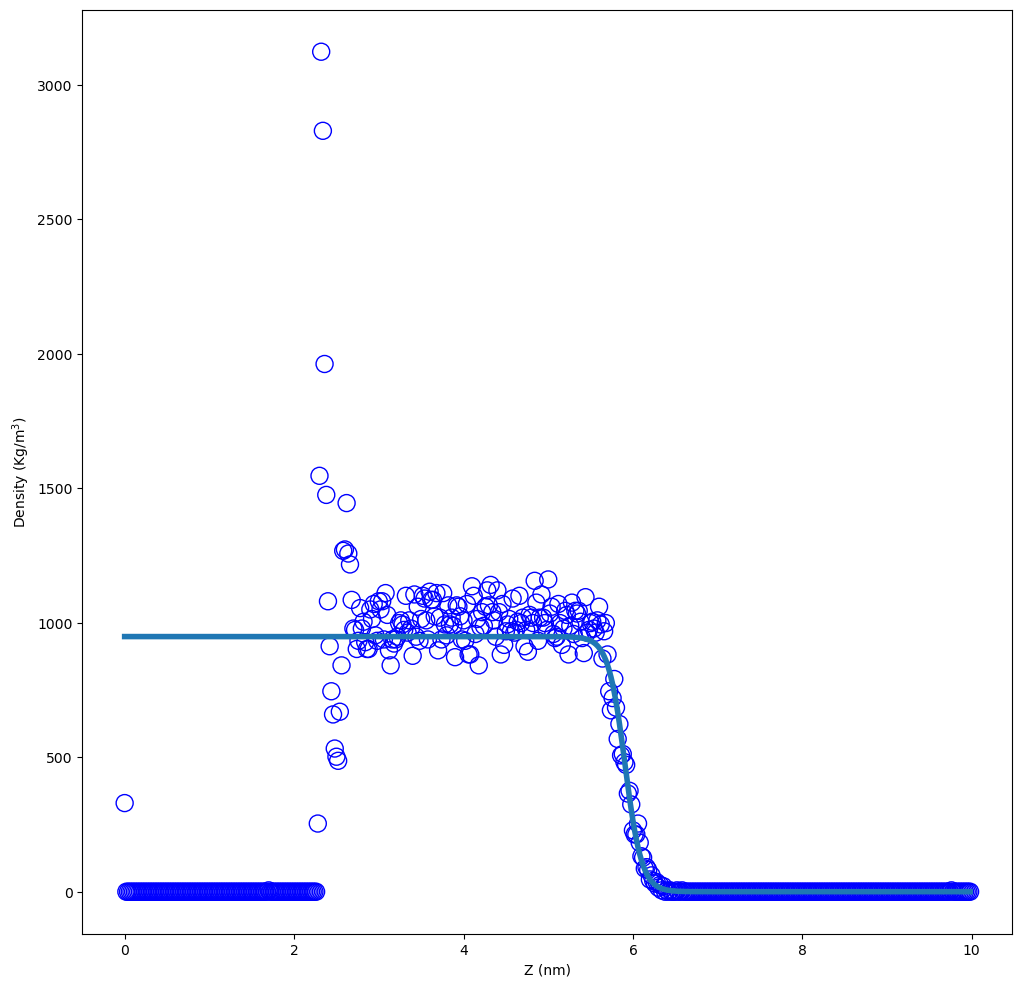

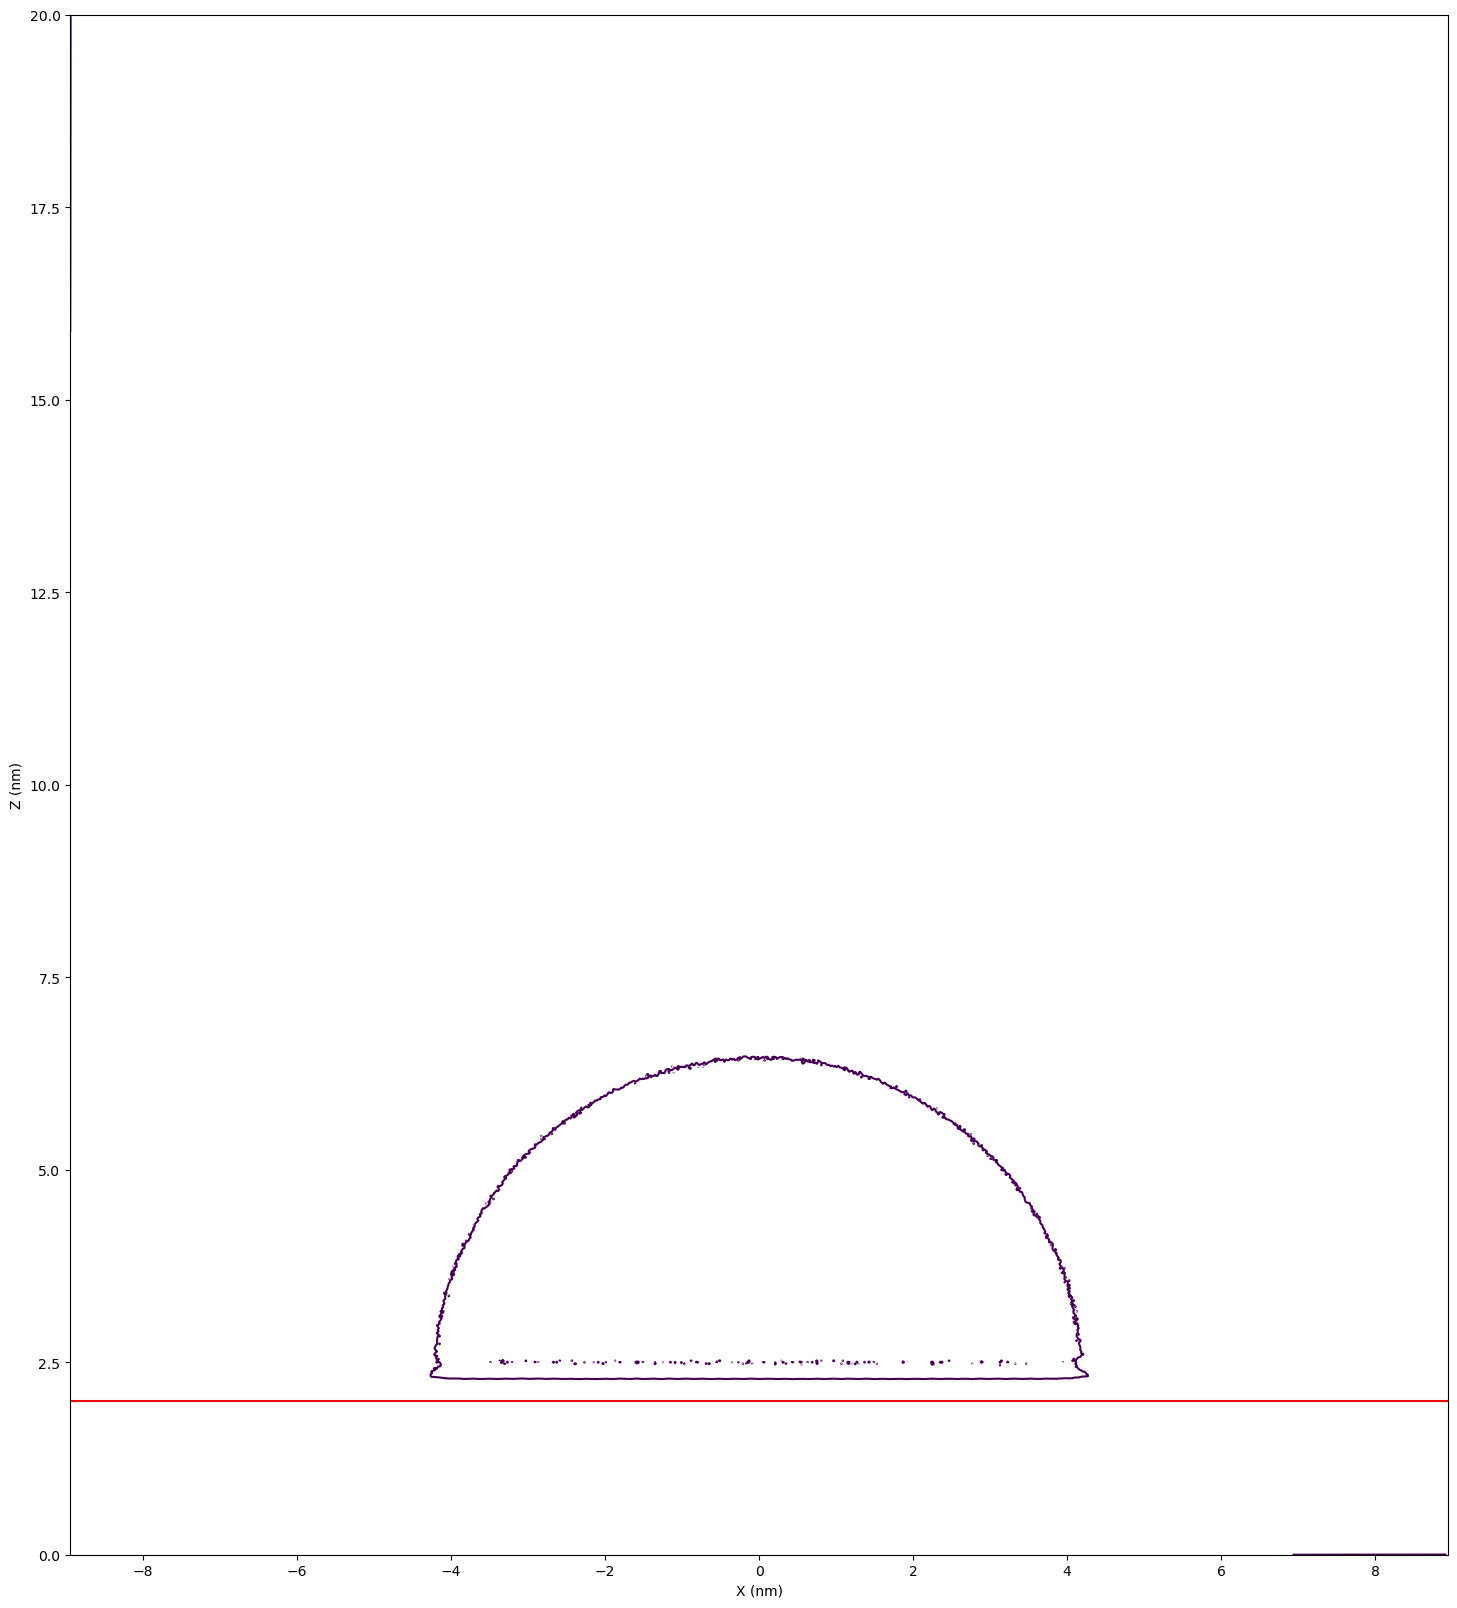

In [5]:
def density_func(x, a, b, c):
    return a * (1 - np.tanh((x - b) / c))


density_line = np.transpose(center_line).flatten()

#### lower and upper bounds of the mass density of the droplet along the totally symmetric axis ####
zfit_index1 = np.where(z == 2)
zfit_index2 = np.where(z == 10)

#### Fitting process ######
params, params_covariance = optimize.curve_fit(
    f=density_func,
    xdata=z[zfit_index1[0][0] : zfit_index2[0][0]],
    ydata=density_line[zfit_index1[0][0] : zfit_index2[0][0]],
    p0=[613, 5, 2],
)

yfitteddata = density_func(z, params[0], params[1], params[2])

plt.figure(1, figsize=(12, 12))
fitted_curve = plt.plot(
    z[0 : zfit_index2[0][0]], yfitteddata[0 : zfit_index2[0][0]], linewidth=4
)
center_line_plot = plt.scatter(
    z[0 : zfit_index2[0][0]],
    center_line[0 : zfit_index2[0][0]],
    marker="o",
    s=150,
    facecolors="none",
    edgecolors="b",
)

# plt.ylim([0,2000])
plt.ylabel('Density (Kg/$\mathregular{m^{3}}$)')
plt.xlabel('Z (nm)')

print(params)
print(np.sqrt(np.diag(params_covariance)))



## extracting 2-D data on the masscontour

xxxxx = np.linspace(x_minmax[0],x_minmax[1],100)
surf = []
for i in range(len(xxxxx)):
    surf.append(2)


plt.figure(2, figsize=(figuresize[0], figuresize[1]))
axes = plt.gca()
axes.set_xlim([x_minmax[0], x_minmax[1]])
axes.set_ylim([y_minmax[0], y_minmax[1]])
axes.set_aspect(1)
masscontour = plt.contour(x, z, trans_dens, levels=[params[0]])
# masscontour = plt.contour(x, z, trans_dens, levels=[1000])
plt.ylabel('Z (nm)')
plt.xlabel('X (nm)')
plt.plot(xxxxx,surf,'-r')

# cir = masscontour.collections[0].get_paths()[0]

# circle = cir.vertices
# circle


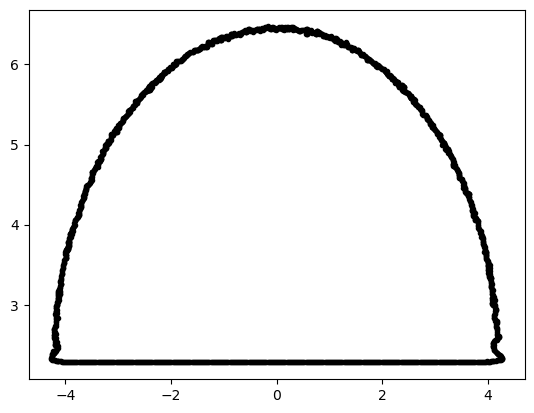

In [6]:
alpha = 2
data = masscontour.allsegs[0][alpha]
for i in range(len(data)):
    plt.plot(data[i][0],data[i][1],'k.')
    # print(data[i][1])


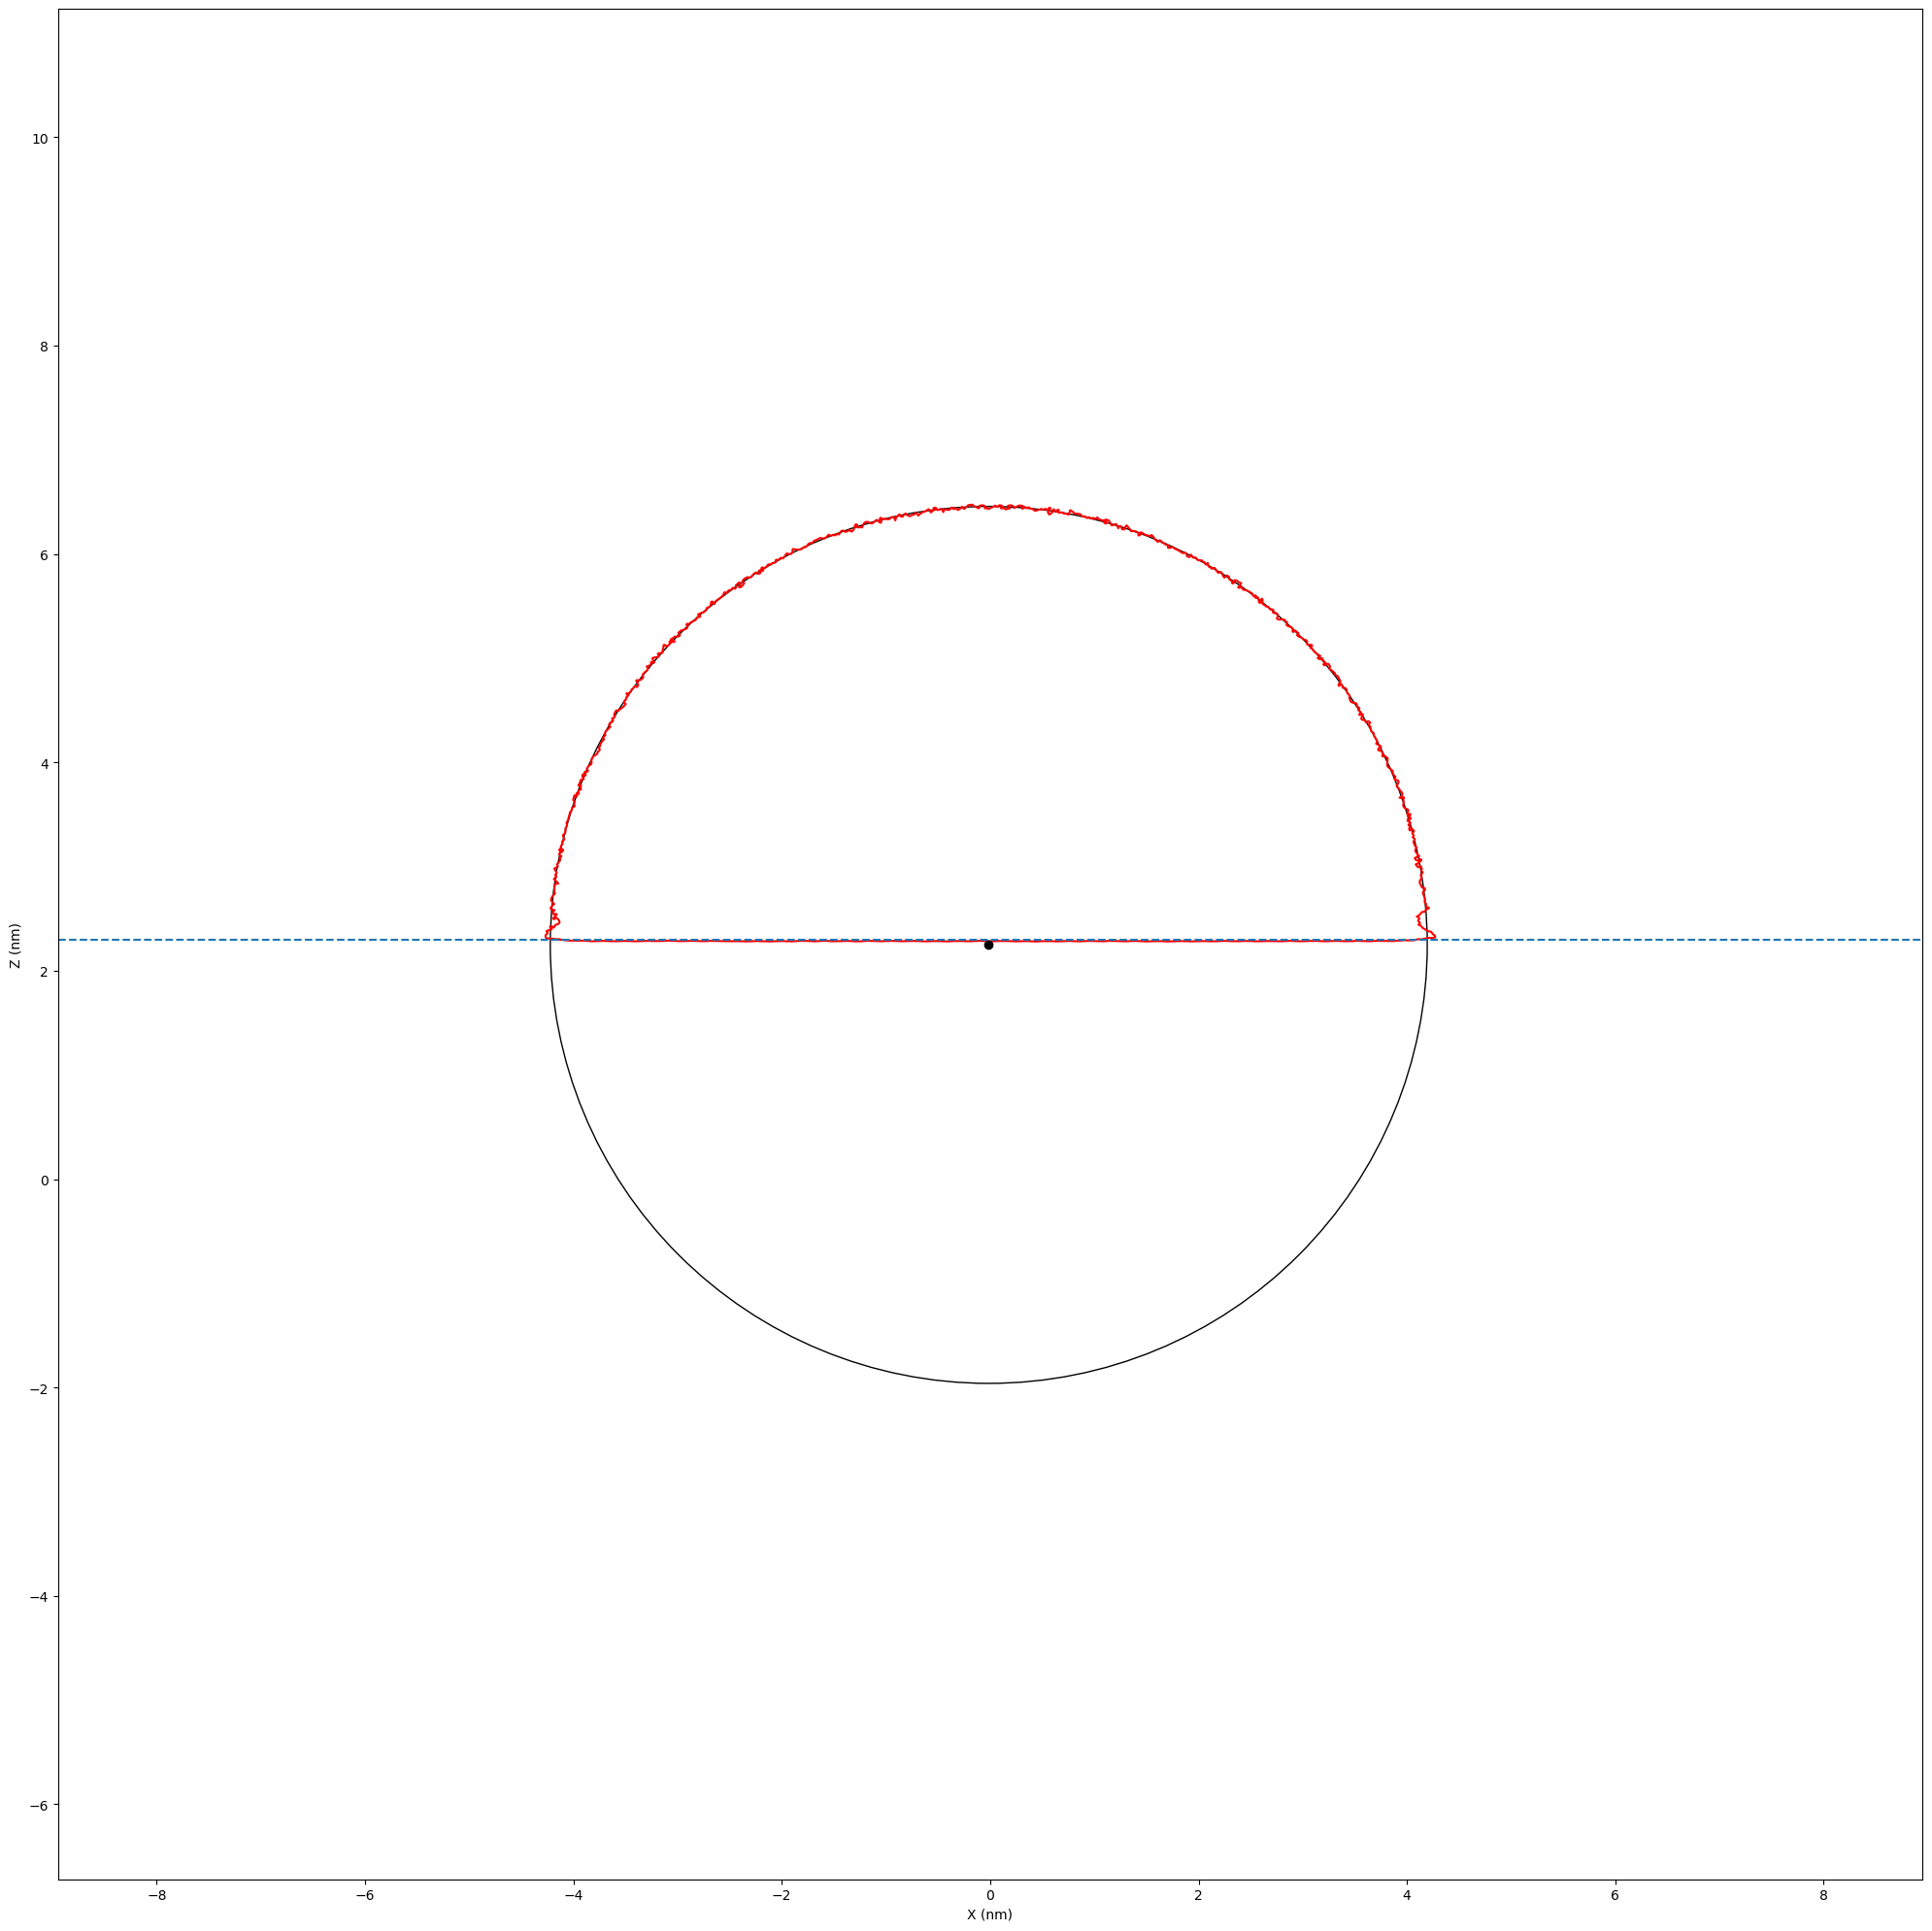

Contact Angle = 89.3573281529258
uncertainty = 0.008219113809069319


In [8]:
def circle_func(x, a, b, c):
    return b + np.sqrt(c ** 2 - (x - a) ** 2)

data = masscontour.allsegs[0][alpha]
X, Z = [], []
for i in range(len(data)):
    if data[i][1] > 3.5:
        Z.append(data[i][1])
        X.append(data[i][0])





## building arrays of the matrix

t1 = []
t2 = []
t3 = []
t4 = []
t5 = []
t6 = []

for i in range(len(X)):
    
    t1.append(X[i]**2)
    t2.append(X[i]*Z[i])
    t3.append(Z[i]**2)
    t4.append(X[i]*(X[i]**2 + Z[i]**2))
    t5.append(Z[i]*(X[i]**2 + Z[i]**2))
    t6.append((X[i]**2 + Z[i]**2))
    




Matrix1 = np.array([[np.sum(t1),np.sum(t2),np.sum(X)], [np.sum(t2),np.sum(t3),np.sum(Z)], [np.sum(X),np.sum(Z),len(X)]])
# m1 = Matrix1.reshape(3,3)

Matrix2 = np.array([np.sum(t4),np.sum(t5),np.sum(t6)])
# m2 = Matrix2.reshape(3,1)

A, B, C = np.linalg.solve(Matrix1, Matrix2) # set_of_variables

if np.allclose(np.dot(Matrix1, [A,B,C]), Matrix2) != True:
    for i in range(1000):
        print("SOMETHING IS WRONG, STOP IT")


a = A/2
b = B/2
R = np.sqrt(4*C + A**2 + B**2)/2

#Checking the fitting

plt.rcParams["figure.figsize"] = [20.00, 20]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot()
circle1 = patches.Circle((a, b), radius=R,fill=False)
ax.add_patch(circle1)
ax.axis('equal')

X, Z = [], []
for i in range(len(data)):
    if data[i][1] > 0:
        Z.append(data[i][1])
        X.append(data[i][0])
surface_X = np.linspace(-cell[0]/2, cell[0]/2,100)
surface_Y = []
for i in range(len(surface_X)):
    surface_Y.append(Z0)

plt.plot(X,Z,'r')
plt.plot(a,b,'ko')
plt.plot(surface_X,surface_Y,'--')
plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')
plt.xlim([-cell[0]/2, cell[0]/2])
plt.show()




# (a,b) = center, a cooresponds to X and b does to Y
# c = R

c = R
arcsin = np.arcsin((b-Z0)/c)
WCA = 90 + m.degrees(arcsin)
print("Contact Angle = " + str(WCA))

cov_matrix = np.linalg.inv(Matrix1)
std_a = np.sqrt(cov_matrix[0, 0])
std_b = np.sqrt(cov_matrix[1, 1])
std_c = np.sqrt(cov_matrix[2, 2])


F = ((b-Z0)/c)
d1 = ( 1 / np.sqrt(1-F**2)) * (1 /c )
d2 = ( 1 / np.sqrt(1-F**2)) * (-F /c )
com1 = (d1 * std_b)**2
com2 = (d2 * std_c)**2

uncertainty = np.sqrt(com1 + com2)
print("uncertainty = " + str(uncertainty))